In [217]:
from bs4 import BeautifulSoup as BS
import requests
from requests import get

In [218]:
r = requests.get('https://www.airlinequality.com/airline-reviews/ba-cityflyer/?sortby=post_date%3ADesc&pagesize=100')
html = BS(r.content, 'html.parser')

In [219]:
date = []
country = []
rate = []

In [220]:
for el in html.find_all("div", class_ = "rating-10"):
    try:
        rate.append(el.span.text)
    except AttributeError:
            rate.append('None')

In [221]:
for el in html.find_all("time"):
    date.append(el.text)

In [222]:
for el in html.find_all("h3"):
    country.append(el.span.next_sibling.text)

In [223]:
countries = []
for i in country:
    i = i.strip(' ()')
    countries.append(i)

In [224]:
print(countries)

['United Kingdom', 'Canada', 'United Kingdom', 'Singapore', 'Germany', 'United Kingdom', 'Switzerland', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Netherlands', 'United Kingdom', 'Australia', 'Netherlands', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Switzerland', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Netherlands', 'United Kingdom', 'Switzerland', 'United Kingdom', 'Spain', 'United Kingdom', 'Austria', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Australia', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'United Kingdom', 'Spain', 'United Kingdom', 'United Ki

In [225]:
len(date)

72

In [226]:
len(countries)

72

In [227]:
rate = rate[1:]

In [228]:
len(rate)

72

In [229]:
import pandas as pd
import numpy as np

In [230]:
df = pd.DataFrame({'country':countries, 'stars':rate, 'date':date})

In [231]:
df.head()

,country,stars,date
0,United Kingdom,7,23rd July 2022
1,Canada,6,5th June 2022
2,United Kingdom,8,26th September 2021
3,Singapore,9,8th January 2020
4,Germany,7,29th October 2019


In [232]:
df.shape

(72, 3)

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt

In [234]:
df.date = pd.to_datetime(df.date)

In [235]:
df.date.head()

0   2022-07-23
1   2022-06-05
2   2021-09-26
3   2020-01-08
4   2019-10-29
Name: date, dtype: datetime64[ns]

In [236]:
df.stars.value_counts()

10      24
8       17
9       12
7        6
6        4
5        4
3        1
None     1
4        1
2        1
1        1
Name: stars, dtype: int64

In [237]:
df.drop(df[df.stars == 'None'].index, axis=0, inplace=True)

In [238]:
df.stars.unique()

array(['7', '6', '8', '9', '5', '3', '10', '4', '2', '1'], dtype=object)

In [239]:
df.isnull().value_counts()

country  stars  date 
False    False  False    71
dtype: int64

In [240]:
df.head()

,country,stars,date
0,United Kingdom,7,2022-07-23
1,Canada,6,2022-06-05
2,United Kingdom,8,2021-09-26
3,Singapore,9,2020-01-08
4,Germany,7,2019-10-29


In [241]:
df.size

213

In [242]:
df.shape

(71, 3)

In [243]:
df.stars.mean()

1.0830698540437718e+93

In [244]:
country_df = pd.DataFrame(df.country.value_counts())

In [245]:
country_df

,country
United Kingdom,55
Switzerland,3
Netherlands,3
Spain,3
Singapore,2
Australia,2
Canada,1
Germany,1
Austria,1


In [246]:
mean_stars_df = df.groupby('country', as_index=False).aggregate({'stars':'mean'}).rename(columns = {'stars':'mean_stars'})

In [247]:
mean_stars_df

,country,mean_stars
0,Australia,4.450000e+01
1,Austria,1.000000e+01
2,Canada,6.000000e+00
3,Germany,7.000000e+00
4,Netherlands,2.963333e+02
5,Singapore,4.550000e+02
6,Spain,3.583333e+02
7,Switzerland,1.860000e+02
8,United Kingdom,1.436298e+74


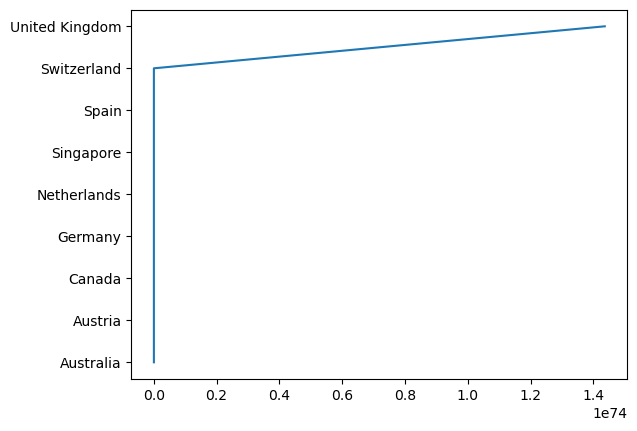

In [271]:
X = mean_stars_df.mean_stars
Y = mean_stars_df.country
plt.plot(X, Y)

<AxesSubplot:>

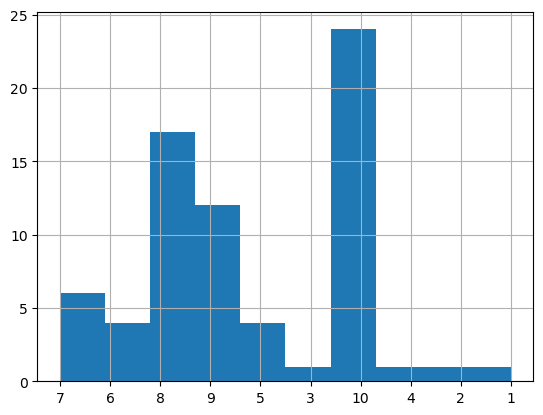

In [248]:
df.stars.hist()

<AxesSubplot:xlabel='stars', ylabel='date'>

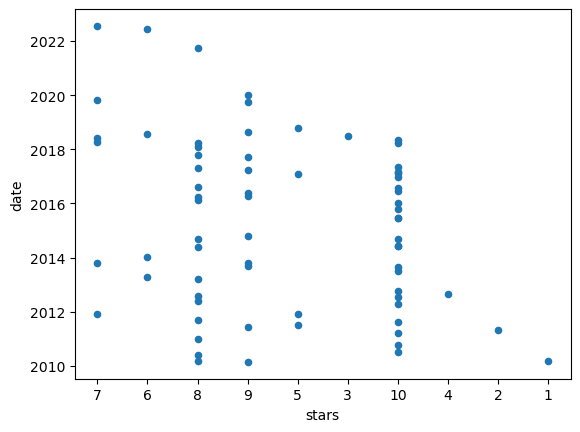

In [249]:
df.plot.scatter(x='stars', y='date')

In [250]:
x = df.date
y1 = df.stars
y2 = df.country

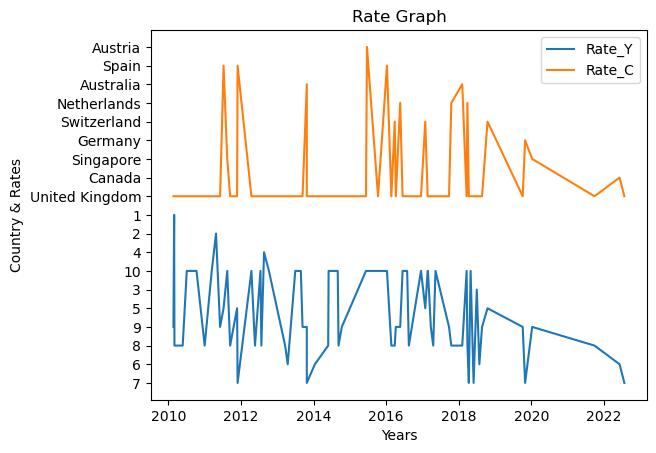

In [251]:
plt.title('Rate Graph')
plt.xlabel("Years")
plt.ylabel("Country & Rates")
plt.plot(x, y1, label="Rate_Y")
plt.plot(x, y2, label="Rate_C")

plt.legend()

In [272]:
import os

In [273]:
cwd = os.getcwd()
df.to_csv(cwd+'/BA.csv')